<a href="https://colab.research.google.com/github/natanascimento/crime-analysis/blob/main/notebooks/%5BMLClass%5DCrime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Analysis

## Importando bibliotecas necessárias

In [154]:
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Criando dataframe a partir do dataset no GitHub

In [155]:
dataset_url = "https://github.com/natanascimento/crime-analysis/blob/main/data/indicadoressegurancapublicauf.xlsx?raw=true"

df = pd.read_excel(dataset_url, sheet_name="Ocorrências")

## Removendo dados do ano de 2021, pois não possui todos os meses. 

In [156]:
df = df.drop(df[df['Ano'] == 2021].index)

## Renomeando colunas

In [157]:
df = df.rename(columns={'UF': 'uf', 'Tipo Crime': 'crime', 
                        'Ano': 'ano', 'Mês': 'mes', 
                        'Ocorrências': 'n_ocorrencias'})

## Visualizando novo dataframe 

In [158]:
df

,uf,crime,ano,mes,n_ocorrencias
1652,Acre,Estupro,2020,janeiro,18
1653,Acre,Furto de veículo,2020,janeiro,23
1654,Acre,Homicídio doloso,2020,janeiro,46
1655,Acre,Lesão corporal seguida de morte,2020,janeiro,0
1656,Acre,Roubo a instituição financeira,2020,janeiro,0
...,...,...,...,...,...
18980,Tocantins,Roubo a instituição financeira,2015,dezembro,6
18981,Tocantins,Roubo de carga,2015,dezembro,1
18982,Tocantins,Roubo de veículo,2015,dezembro,55
18983,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2


## Agrupando dados e obtendo Ano, UF e indicadores de ocorrências

In [159]:
group_uf = df.groupby(['ano', 'uf'])['n_ocorrencias'].sum()

df_estados = pd.DataFrame()

column_ano = pd.Series([])
column_uf = pd.Series([])

row = 0

for index, value in group_uf.iteritems():
  column_ano[row] = index[0]
  column_uf[row] = index[1]
  row += 1

df_estados['ano'] = column_ano
df_estados['uf'] = column_uf

df_estados.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,ano,uf
0,2015,Acre
1,2015,Alagoas
2,2015,Amapá
3,2015,Amazonas
4,2015,Bahia


## Gerando número total de cada crime

In [160]:
columns = ['ano', 'uf', 'Estupro', 
          'Furto de veículo', 'Homicídio doloso', 
          'Lesão corporal seguida de morte', 'Roubo a instituição financeira', 
          'Roubo de carga', 'Roubo de veículo', 
          'Roubo seguido de morte (latrocínio)', 'Tentativa de homicídio']

df_estados = pd.DataFrame(df_estados, columns=columns)

crimes = df.groupby(['ano', 'uf', 'crime'])['n_ocorrencias'].sum()

row = -1
uf = 'uf'

for index, total in crimes.iteritems():
  if(index[1] != uf):
    row += 1
    uf = index[1]

  if(df_estados['ano'][row] == index[0] and df_estados['uf'][row] == index[1]):
    df_estados[index[2]][row] = total

df_estados.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ano,uf,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio
0,2015,Acre,42.0,0.0,189.0,3.0,0.0,0.0,0.0,10.0,16.0
1,2015,Alagoas,567.0,696.0,1633.0,9.0,21.0,95.0,3158.0,56.0,704.0
2,2015,Amapá,354.0,877.0,248.0,2.0,2.0,NaN,310.0,17.0,315.0
3,2015,Amazonas,756.0,1867.0,1313.0,8.0,52.0,0.0,2781.0,69.0,394.0
4,2015,Bahia,2450.0,5539.0,5422.0,125.0,60.0,436.0,14451.0,204.0,2844.0


## Alterando valores nulos (NaN) para zero

In [161]:
df_estados = df_estados.fillna(0)

## Visualizando dados pré-processados

In [162]:
columns = ['ano', 'uf', 
           'Furto de veículo', 'Roubo a instituição financeira', 
           'Roubo de carga', 'Roubo de veículo', 
           'Roubo seguido de morte (latrocínio)']

In [163]:
df_estados = df_estados[columns]

In [164]:
df_estados

,ano,uf,Furto de veículo,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio)
0,2015,Acre,0.0,0.0,0.0,0.0,10.0
1,2015,Alagoas,696.0,21.0,95.0,3158.0,56.0
2,2015,Amapá,877.0,2.0,0.0,310.0,17.0
3,2015,Amazonas,1867.0,52.0,0.0,2781.0,69.0
4,2015,Bahia,5539.0,60.0,436.0,14451.0,204.0
...,...,...,...,...,...,...,...
157,2020,Roraima,701.0,2.0,0.0,487.0,17.0
158,2020,Santa Catarina,7544.0,8.0,13.0,1384.0,17.0
159,2020,Sergipe,788.0,2.0,0.0,2524.0,28.0
160,2020,São Paulo,65724.0,29.0,5918.0,31893.0,179.0


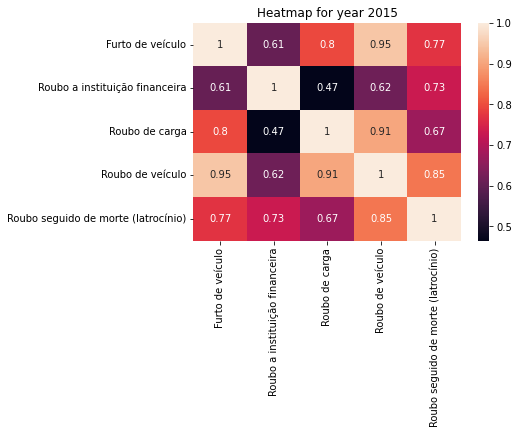

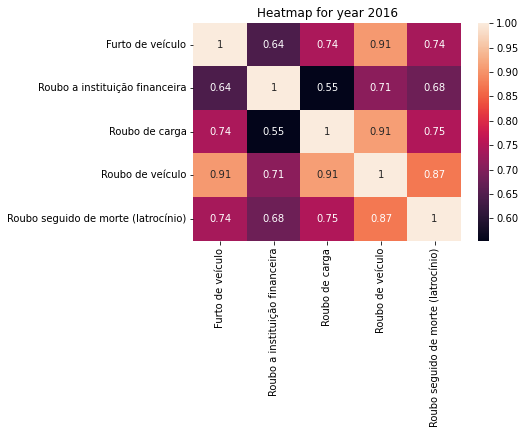

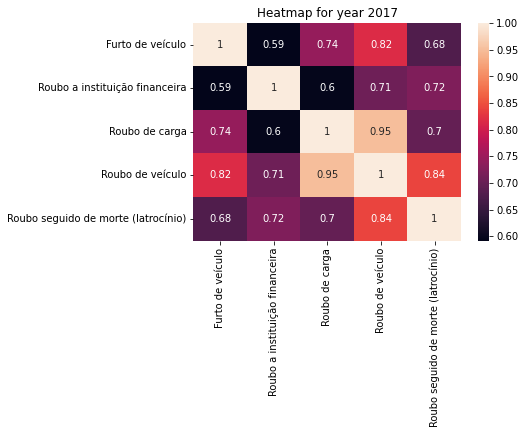

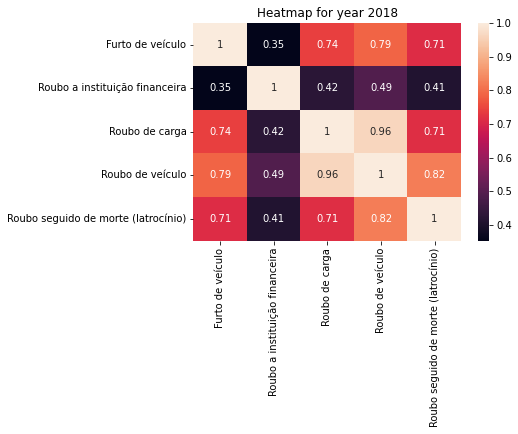

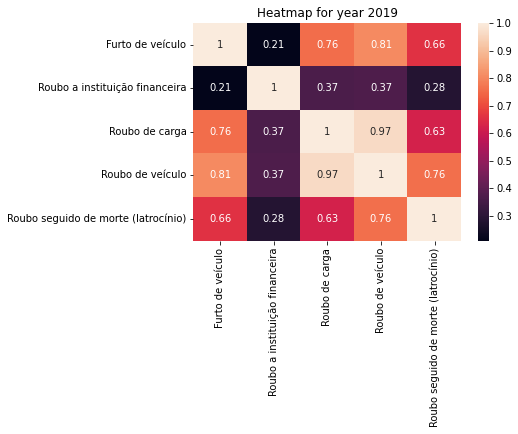

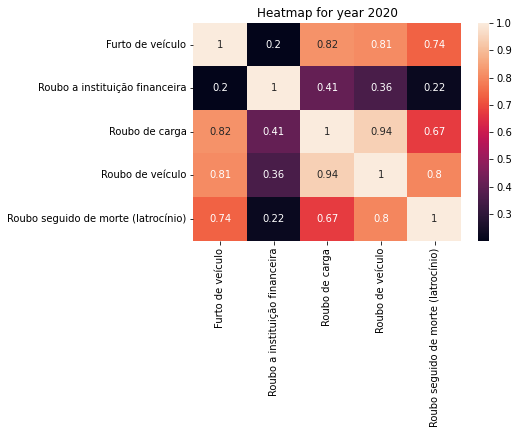

In [165]:
columns = ['Furto de veículo', 'Roubo a instituição financeira', 
           'Roubo de carga', 'Roubo de veículo', 
           'Roubo seguido de morte (latrocínio)']

anos = [2015, 2016, 2017, 2018, 2019, 2020]

for ano in anos: 
  corr_estados = df_estados[df_estados['ano'] == ano]
  corr_estados = corr_estados[columns].corr()

  ax = plt.axes()

  sns.heatmap(corr_estados, xticklabels=columns, yticklabels=columns, 
              annot=True, ax=ax)
  
  ax.set_title(f'Heatmap for year {ano}')

  plt.show()
  

## Padronizando dataframe para manter a mesma escala de valores

In [166]:

columns = ['Furto de veículo', 'Roubo a instituição financeira', 
           'Roubo de carga', 'Roubo de veículo',
           'Roubo seguido de morte (latrocínio)']

df_estados_scaler = df_estados[columns].values

min_max_scaler = preprocessing.MinMaxScaler()

df_estados_w_scaler = min_max_scaler.fit_transform(df_estados_scaler)

df_estados_scaler = pd.DataFrame(df_estados_w_scaler, 
                                 index=df_estados.index, 
                                 columns=columns)

df_estados = pd.DataFrame()

df_estados['ano'] = column_ano
df_estados['uf'] = column_uf

df_estados = pd.concat([df_estados, df_estados_scaler], axis=1)

In [167]:
#Adicionando a região que cada estado pertence para melhor avaliação

norte = ['Acre', 'Amapá', 'Amazonas', 'Pará',
        'Rondônia', 'Roraima', 'Tocantins',]

nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
            'Pernambuco', 'Paraíba', 'Sergipe', 'Alagoas', 'Bahia']

centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']

sudeste = ['Espírito Santo', 'São Paulo', 'Minas Gerais', 'Rio de Janeiro']

sul = ['Paraná', 'Santa Catarina', 'Rio Grande do Sul']

def set_region(row):
  if row['uf'] in norte:
    return "NORTE"
  if row['uf'] in nordeste:
    return "NORDESTE"
  if row['uf'] in centro_oeste:
    return "CENTRO-OESTE"
  if row['uf'] in sudeste:
    return "SUDESTE"
  if row['uf'] in sul:
    return "SUL"

df_estados['regiao'] = df_estados.apply(set_region, axis=1)

In [168]:
df_estados

,ano,uf,Furto de veículo,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),regiao
0,2015,Acre,0.000000,0.000000,0.000000,0.000000,0.020057,NORTE
1,2015,Alagoas,0.006274,0.132075,0.008963,0.040148,0.151862,NORDESTE
2,2015,Amapá,0.007906,0.012579,0.000000,0.003941,0.040115,NORTE
3,2015,Amazonas,0.016830,0.327044,0.000000,0.035355,0.189112,NORTE
4,2015,Bahia,0.049931,0.377358,0.041136,0.183717,0.575931,NORDESTE
...,...,...,...,...,...,...,...,...
157,2020,Roraima,0.006319,0.012579,0.000000,0.006191,0.040115,NORTE
158,2020,Santa Catarina,0.068006,0.050314,0.001227,0.017595,0.040115,SUL
159,2020,Sergipe,0.007103,0.012579,0.000000,0.032088,0.071633,NORDESTE
160,2020,São Paulo,0.592471,0.182390,0.558355,0.405459,0.504298,SUDESTE


## Rodando ***K-means*** no dataset tratado

In [169]:
columns = ['Furto de veículo', 'Roubo a instituição financeira', 
           'Roubo de carga', 'Roubo de veículo', 
           'Roubo seguido de morte (latrocínio)']

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_estados[columns])
  score_mean = metrics.silhouette_score(df_estados[columns], 
                                        kmeans.labels_, 
                                        metric='euclidean')
  print(f"Cluster: {k} | Score: {round(score_mean, 5)}")

Cluster: 2 | Score: 0.75154
Cluster: 3 | Score: 0.53614
Cluster: 4 | Score: 0.54427
Cluster: 5 | Score: 0.54427
Cluster: 6 | Score: 0.5518
Cluster: 7 | Score: 0.43745
Cluster: 8 | Score: 0.38459
Cluster: 9 | Score: 0.44132


In [170]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_estados[columns])

KMeans(n_clusters=5)

In [171]:
clusters = kmeans.labels_.tolist()
clusters_dict = {'ano': list(df_estados.ano), 'uf': df_estados.uf, 
                 'regiao': df_estados.regiao, 'cluster': clusters}
df_estados_clusters = pd.DataFrame(clusters_dict, 
                                   columns = ['cluster','ano', 'uf', 'regiao'])

In [172]:
df_estados_clusters

,cluster,ano,uf,regiao
0,0,2015,Acre,NORTE
1,0,2015,Alagoas,NORDESTE
2,0,2015,Amapá,NORTE
3,4,2015,Amazonas,NORTE
4,2,2015,Bahia,NORDESTE
...,...,...,...,...
157,0,2020,Roraima,NORTE
158,0,2020,Santa Catarina,SUL
159,0,2020,Sergipe,NORDESTE
160,1,2020,São Paulo,SUDESTE


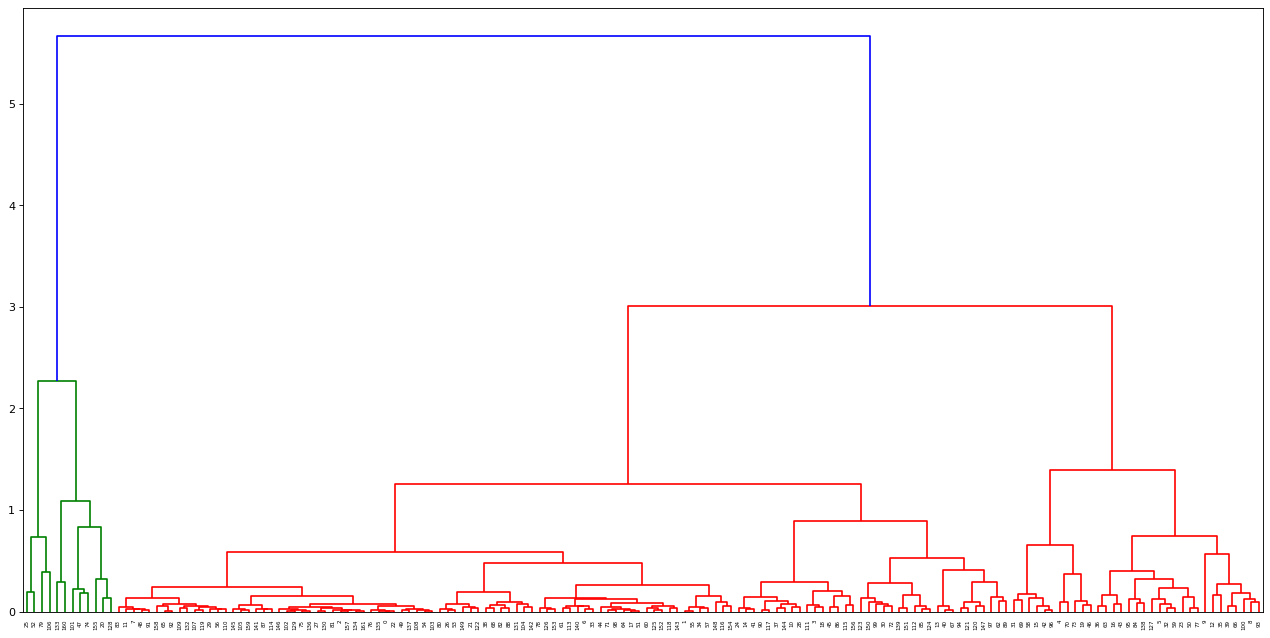

In [173]:
plt.figure(figsize=(20, 10), dpi=80)
dend = shc.dendrogram(shc.linkage(df_estados[columns], method='ward'))

## Rodando ***Hierárquico*** a partir do dataset tratado

In [174]:
agg_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
agg_cluster.fit(df_estados[columns])

AgglomerativeClustering(n_clusters=5)

In [175]:
clusters_dict_agg = {'ano': list(df_estados.ano), 
                     'uf': df_estados.uf, 
                     'regiao': df_estados.regiao, 
                     'cluster': agg_cluster.labels_.tolist()}

clusters_agg_df = pd.DataFrame(clusters_dict_agg, 
                               columns = ['cluster','ano', 'uf', 'regiao'])

In [176]:
clusters_agg_df

,cluster,ano,uf,regiao
0,0,2015,Acre,NORTE
1,0,2015,Alagoas,NORDESTE
2,0,2015,Amapá,NORTE
3,0,2015,Amazonas,NORTE
4,4,2015,Bahia,NORDESTE
...,...,...,...,...
157,0,2020,Roraima,NORTE
158,0,2020,Santa Catarina,SUL
159,0,2020,Sergipe,NORDESTE
160,1,2020,São Paulo,SUDESTE


In [177]:
agg_score = metrics.silhouette_score(df_estados[columns], 
                                     agg_cluster.labels_, 
                                     metric='euclidean')

print(f"Hierarchy Score: {agg_score}")

Hierarchy Score: 0.5414118997168986


In [178]:
k_score = metrics.silhouette_score(df_estados[columns], 
                                   kmeans.labels_, 
                                   metric='euclidean')

print(f"K-Means Score: {k_score}")

K-Means Score: 0.5501577746703735


In [194]:
df_estados_clusters.to_csv("/content/cluster_estados.csv", header=True)